<a href="https://colab.research.google.com/github/KSR-16/Life-Expectancy-Model/blob/main/Group_6_Life_Expectancy_Cleaning_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 # Import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Data Cleaning

In [ ]:
# Read in dataset
pd.set_option('display.max_columns', None)
dataset = "https://raw.githubusercontent.com/KSR-16/Life-Expectancy-Model/main/Life-Expectancy-Data-Updated.csv"
df = pd.read_csv(dataset)
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,97,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,97,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,67,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,92,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,94,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


## Metadata
| Field                       | Description                                                                                               |
|-----------------------------|-----------------------------------------------------------------------------------------------------------|
| Region                      | 179 countries are distributed in 9 regions. E.g. Africa, Asia, Oceania etc                                |
| Year                        | Years observed from 2000 to 2015                                                                          |
| Infant_deaths               | Represents infant deaths per 1000 population                                                              |
| Under_five_deaths           | Represents deaths of children under five years old per 1000 population                                    |
| Adult_mortality             | Represents deaths of adults per 1000 population                                                           |
| Alcohol_consumption         | Represents alcohol consumption that is recorded in liters of pure alcohol per capita with 15+ years old   |
| Hepatitis_B                 | Represents % of coverage of Hepatitis B (HepB3) immunization among 1-year-olds.                           |
| Measles                     | Represents % of coverage of Measles containing vaccine first dose (MCV1) immunization among 1-year-olds   |
| BMI                         | Measure of nutritional status in adults  (kg/m**2)                                                        |
| Polio                       | Represents % of coverage of Polio (Pol3) immunization among 1-year-olds.                                  |
| Diphtheria                  | Represents % of coverage of Diphtheria tetanus toxoid and pertussis (DTP3) immunization among 1-year-olds |
| Incidents_HIV               | Incidents of HIV per 1000 population aged 15-49                                                           |
| GDP_per_capita              | GDP per capita in current USD($)                                                                          |
| Population_mln              | Total population in millions                                                                              |
| Thinness_ten_nineteen_years | Prevalence of thinness among adolescents aged 10-19 years. BMI < -2 stdev below the median                |
| Thinness_five_nine_years    | Prevalence of thinness among children aged 5-9 years. BMI < -2 stdev below the median.                    |
| Schooling                   | Average years that people aged 25+ spent in formal education                                              |
| Economy_status_Developed    | Developed country                                                                                         |
| Economy_status_Developing   | Developing country                                                                                        |
| Life_expectancy             | Average life expectancy of both genders in different years from 2010 to 2015                              |

In [ ]:
# Check shape of dataframe
df.shape

(2864, 21)

In [ ]:
df[['Country']].nunique()

Country    179
dtype: int64

In [ ]:
# Check for null values
df.isnull().sum()

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
Life_expectancy                0
dtype: int64

In [ ]:
# Check for duplicated rows
df.duplicated().sum()

0

In [ ]:
# Check data types
df.dtypes

Country                         object
Region                          object
Year                             int64
Infant_deaths                  float64
Under_five_deaths              float64
Adult_mortality                float64
Alcohol_consumption            float64
Hepatitis_B                      int64
Measles                          int64
BMI                            float64
Polio                            int64
Diphtheria                       int64
Incidents_HIV                  float64
GDP_per_capita                   int64
Population_mln                 float64
Thinness_ten_nineteen_years    float64
Thinness_five_nine_years       float64
Schooling                      float64
Economy_status_Developed         int64
Economy_status_Developing        int64
Life_expectancy                float64
dtype: object

In [ ]:
# Get statistics of data and round to 3 digits
df.describe().round(3)

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2864.000,2864.000,2864.000,2864.000,2864.000,2864.000,2864.000,2864.000,2864.00,2864.000,2864.000,2864.000,2864.000,2864.000,2864.000,2864.000,2864.000,2864.000,2864.000
mean,2007.500,30.364,42.938,192.252,4.821,84.293,77.345,25.033,86.50,86.272,0.894,11540.925,36.676,4.866,4.900,7.632,0.207,0.793,68.856
std,4.611,27.538,44.570,114.910,3.982,15.996,18.660,2.194,15.08,15.534,2.381,16934.789,136.486,4.438,4.525,3.172,0.405,0.405,9.406
min,2000.000,1.800,2.300,49.384,0.000,12.000,10.000,19.800,8.00,16.000,0.010,148.000,0.080,0.100,0.100,1.100,0.000,0.000,39.400
25%,2003.750,8.100,9.675,106.910,1.200,78.000,64.000,23.200,81.00,81.000,0.080,1415.750,2.098,1.600,1.600,5.100,0.000,1.000,62.700
50%,2007.500,19.600,23.100,163.842,4.020,89.000,83.000,25.500,93.00,93.000,0.150,4217.000,7.850,3.300,3.400,7.800,0.000,1.000,71.400
75%,2011.250,47.350,66.000,246.791,7.778,96.000,93.000,26.400,97.00,97.000,0.460,12557.000,23.688,7.200,7.300,10.300,0.000,1.000,75.400
max,2015.000,138.100,224.900,719.360,17.870,99.000,99.000,32.100,99.00,99.000,21.680,112418.000,1379.860,27.700,28.600,14.100,1.000,1.000,83.800


In [ ]:
# Copy dataframe
temp_df = df.copy()

# Drop unnecessary columns
temp_df.drop(columns=['Country','Year'], inplace=True)

- Dropped country and year as they are not relevant in predicting life expectancy
- Region will be used in the model and will be one hot encoded during feature engineering
# EDA

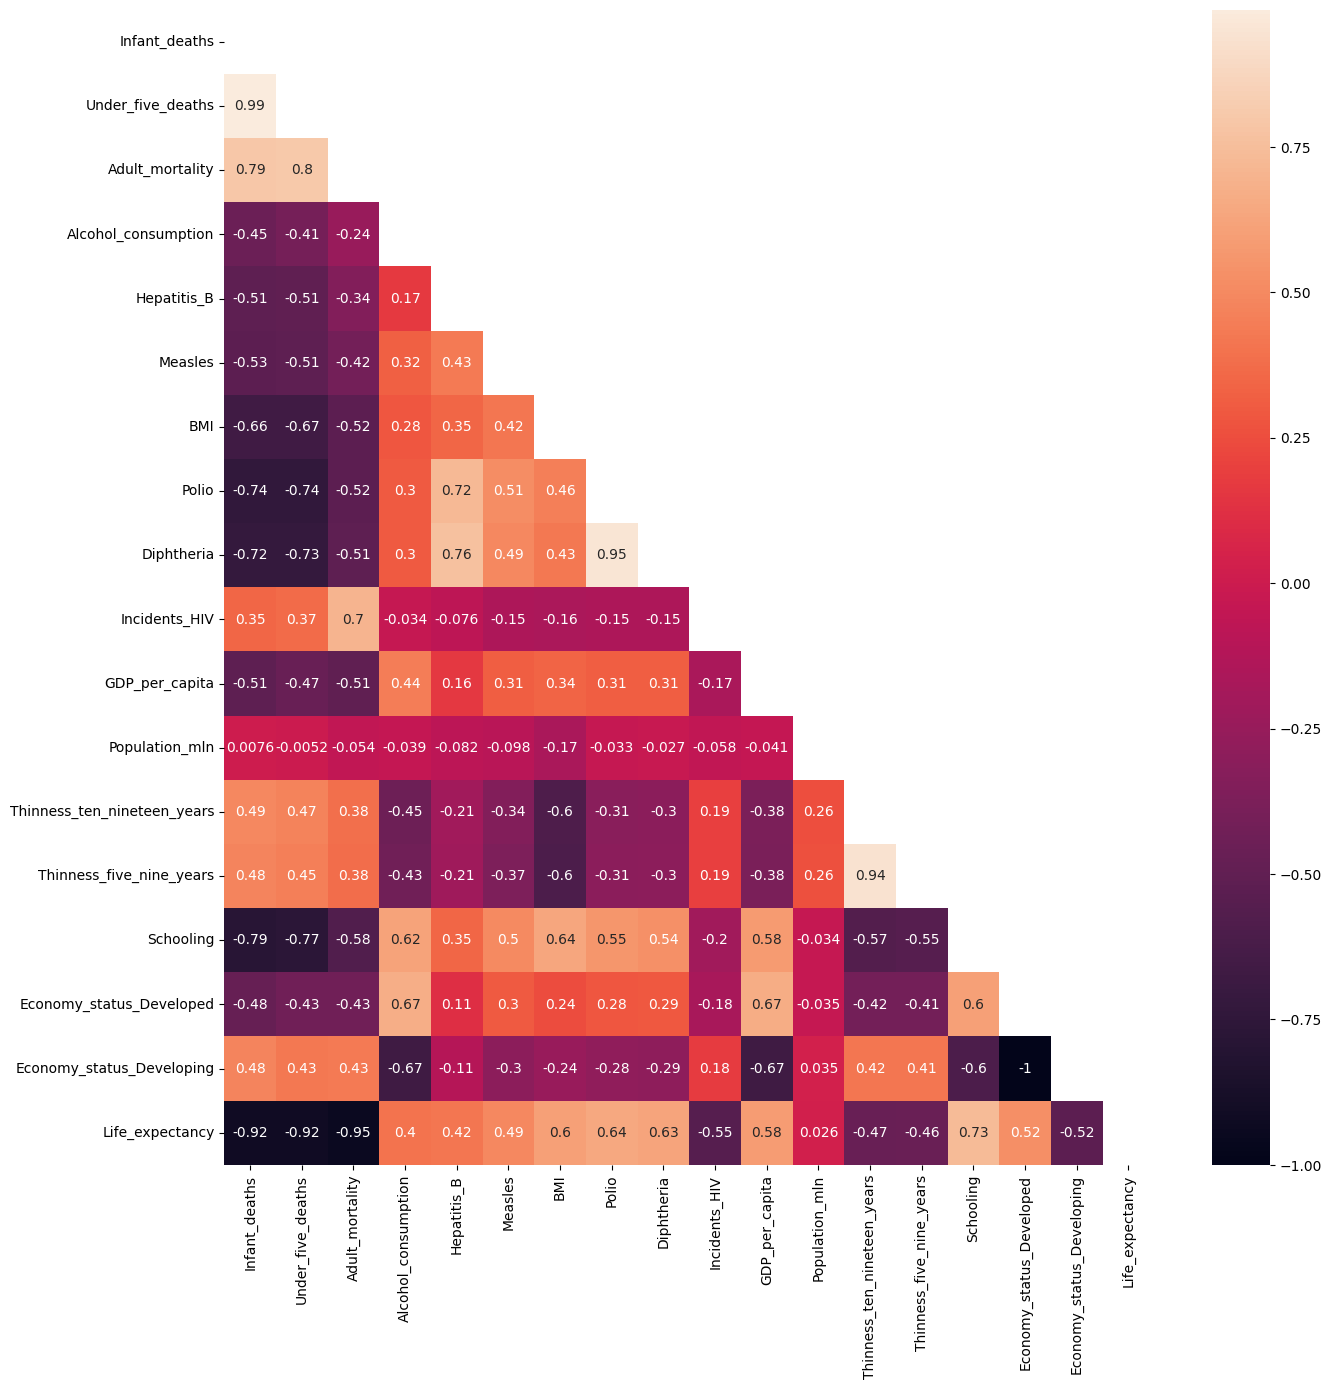

In [ ]:
# Look at correlation of all numerical values using a heatmap
plt.figure(figsize = (15, 15))
sns.heatmap(temp_df.corr(numeric_only=True),annot=True, mask=np.triu(temp_df.corr(numeric_only=True)))
plt.show()

**Notable high correlations:**
infant_deaths + under_five_deaths = 0.95
infant_deaths + adult_mortality = 0.79
adult_mortality + under_five_deaths = 0.80
diptheria + polio = 0.95
thinnes_five_nine_years + thinnes_ten_nineteen_years = 0.94

**Notable low correlations:**
life_expectancy + infant_deaths = -0.92
life_expectancy + under_five_deaths = -0.92
life_expectancy + adult_mortality = -0.95

In [ ]:
# Get dataframe of just numerical values
numerical_df = temp_df.drop(columns = ['Region', 'Economy_status_Developed', 'Economy_status_Developing'])

In [ ]:
for a in numerical_df.columns:
    print(a)

Infant_deaths
Under_five_deaths
Adult_mortality
Alcohol_consumption
Hepatitis_B
Measles
BMI
Polio
Diphtheria
Incidents_HIV
GDP_per_capita
Population_mln
Thinness_ten_nineteen_years
Thinness_five_nine_years
Schooling
Life_expectancy


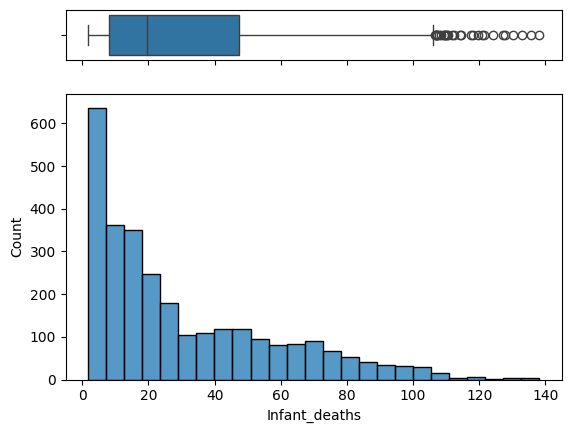

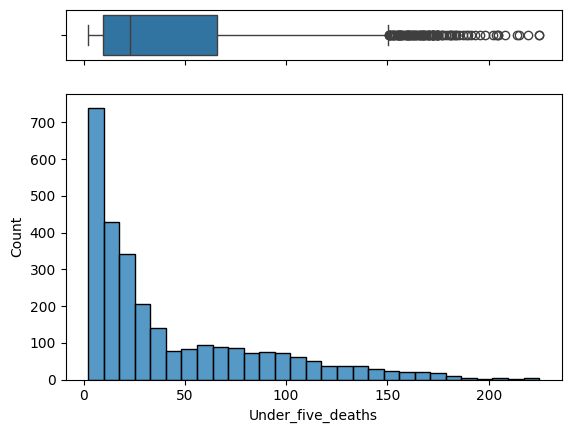

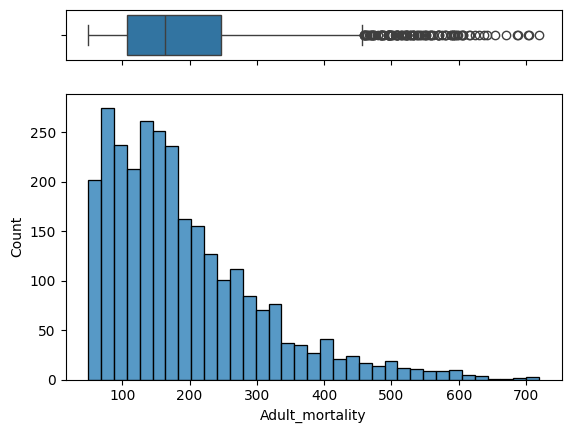

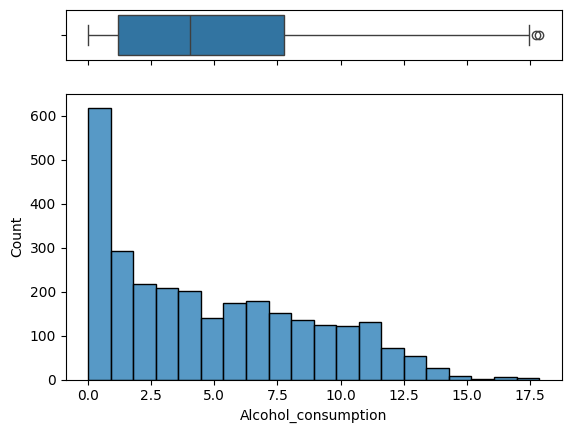

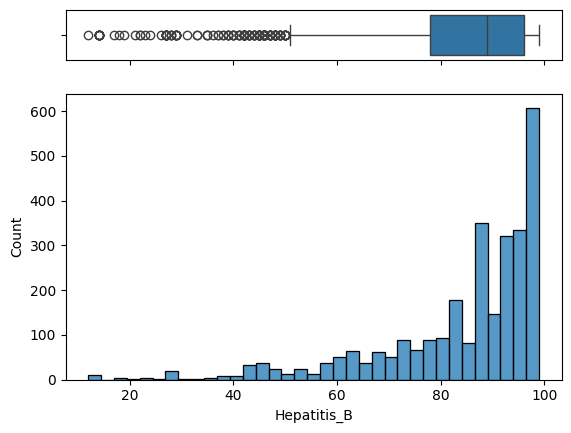

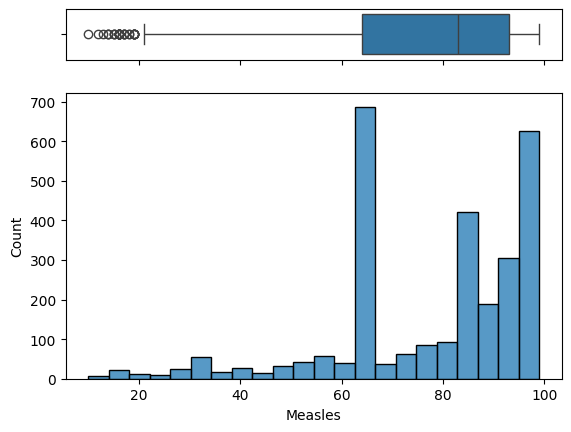

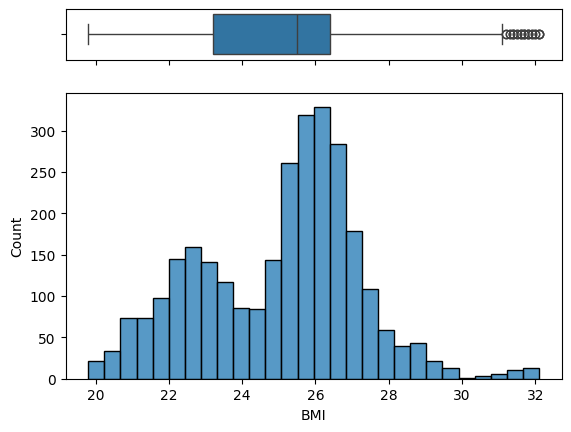

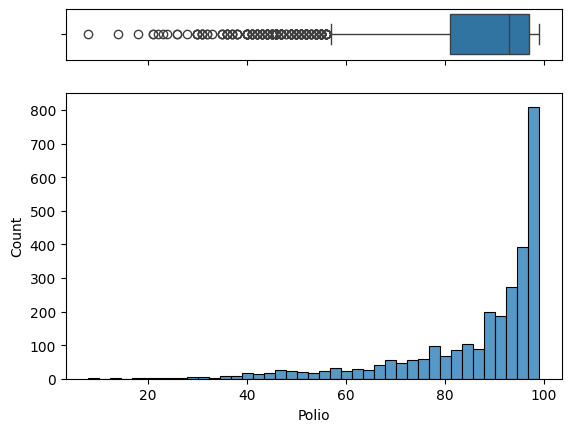

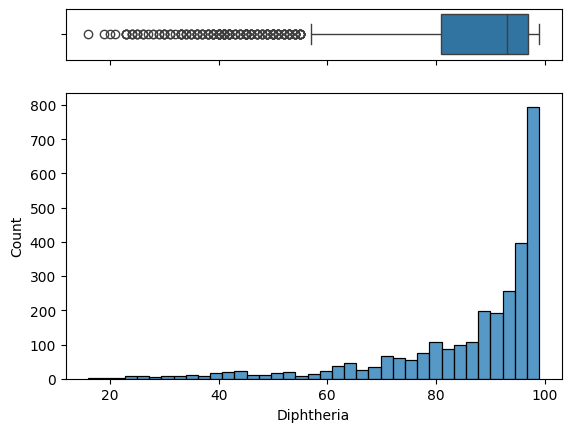

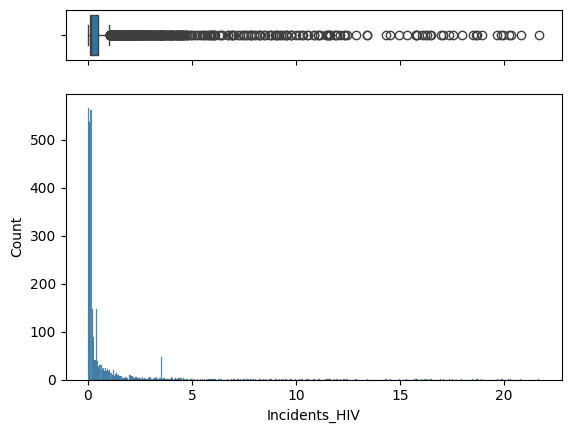

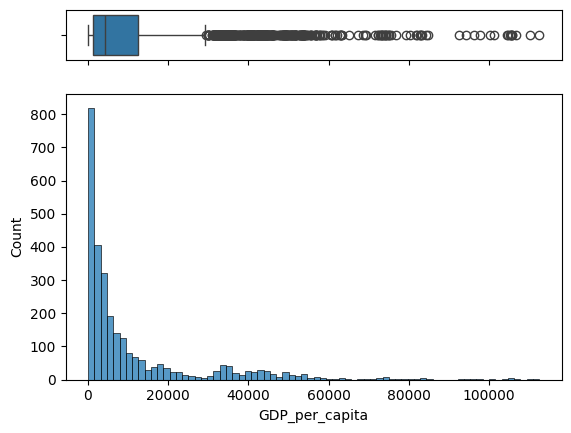

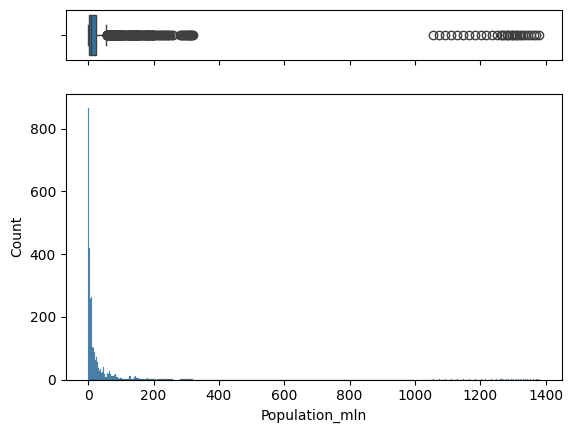

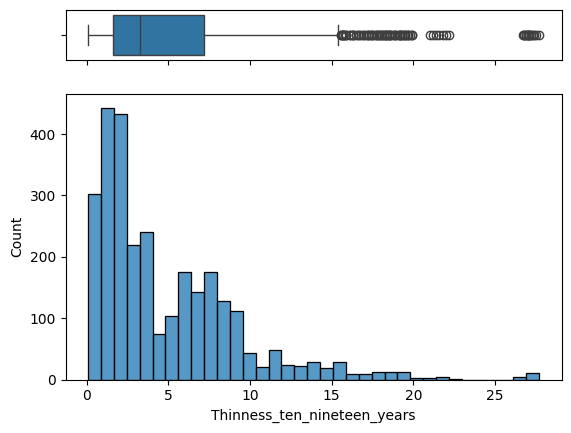

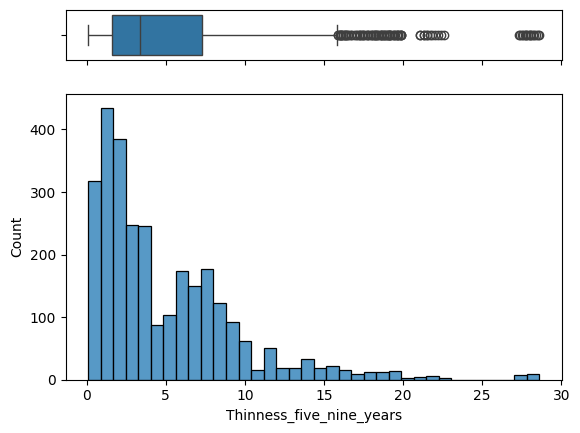

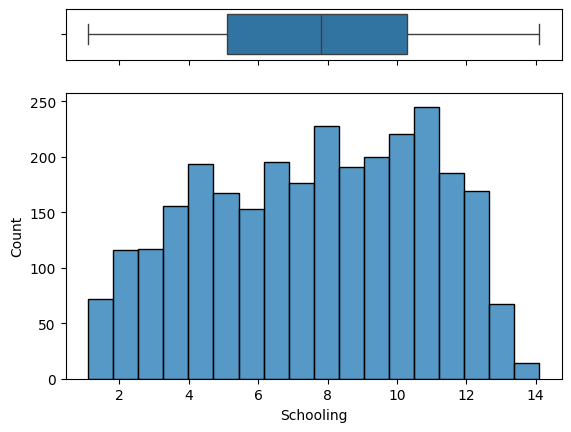

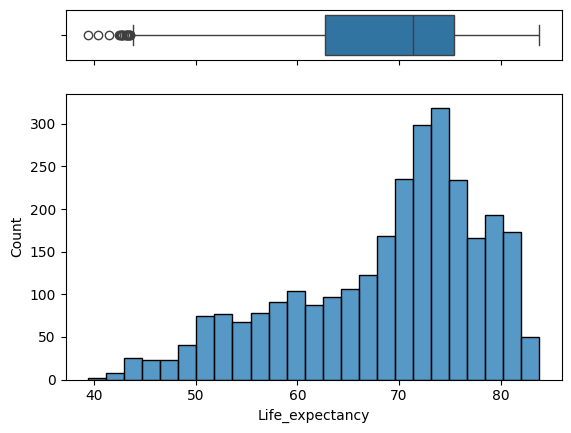

In [ ]:
# Define a function that creates boxplot AND histogram
def creating_box_hist(column, df):
    # Create a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

    # Assign a graph to each ax
    sns.boxplot(df[column], ax=ax_box, orient='h')
    sns.histplot(data=df, x=column, ax=ax_hist)

    # Remove x-axis name for the boxplot
    ax_box.set(xlabel='')
    plt.show()

# Iterate through columns in numerical_df, create boxplot AND histogram
for column in numerical_df.columns:
    creating_box_hist(column, numerical_df)

Outliers in many columns so we are going to scale the data using the following methods:

Minmax = Schooling, BMI, Alcohol Consumption
Robust = The rest

In [ ]:
# Save clean data as csv file
temp_df.to_csv('Clean_Life_Expectancy_Data.csv',index = False)

##Save csv file on local machine to downloads
from google.colab import files
files.download('Clean_Life_Expectancy_Data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>